In [1]:




import mne
import pandas as pd 
import os
import matplotlib.pyplot as plt

import numpy as np
import platform

import sys

#sys.path.append('/media/vivi/Data/linux/Code/BBC') 

#os.chdir('d:/switchdrive/BBC/WP1/data/Code/python/tsk_processing_1/base')
#os.chdir('c:/Users/Engi/all/BBC/WP1/data/Code/python/tsk_processing_1/base')
#os.chdir('/Users/leupinv/switchdrive/BBC/WP1/data/Code/python/tsk_processing_1/base')


if platform.system()=='Darwin':
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')

    

elif platform.system()=='Windows':
    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')
elif platform.system()=='Linux':
    os.chdir('/run/user/1000/gvfs/smb-share:server=bigdata,share=arts/Psycho/BBC/BBC/WP1/data/EEG/tsk')
    os.chdir('c:/Users/Engi/all/BBC/WP1/data/EEG/tsk')
from base.files_in_out import getListOfFiles,GetFiles
from stats.stats_helper import filter_list, tTest_ana
import stats.inverse_stats_helper as hp
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage
from base.base_constants import G_N


In [2]:
import base.files_in_out

In [3]:
os.getcwd()

'Z:\\BBC\\WP1\\data\\EEG\\tsk'

In [4]:
fwd=mne.read_forward_solution('coregistration/BBC_5124sol-fwd.fif')

Reading forward solution from Z:\BBC\WP1\data\EEG\tsk\coregistration\BBC_5124sol-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (5124 sources, 128 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [5]:
#fwd['src'].plot(trans='coregistration/g01_v2-trans.fif')

In [6]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
plt.style.use('default')

mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False

In [7]:
g_num=None
eeg_format='.stc'
eeg_exp='tsk'
fold_5124_loose_dep3_covend_eLORETA='ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/eLORETA'
fold_5124_fixed_dep3_covend_eLORETA='ana/MNE/source/5124_source/fixed/cov_end/depth_3/stc/eLORETA'
fold_5124_loose_dep3_covend_MNE='ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/MNE'
fold_5124_loose_dep3_covend_dSPM='ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM'

In [8]:
files = GetFiles(fold_5124_loose_dep3_covend_dSPM,g_num=g_num,eeg_format=eeg_format)
stc_files=files.fflist

In [9]:
stc_files

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskOFF_

In [ ]:
# Repeated measure ANOVAs
Cardiac effect:

In [ ]:
# read effects
g_num=None
eeg_format='.stc'
eeg_exp='tsk'
anovas_effect='ana/MNE/stats/inverse/anovas/'


In [ ]:
files = GetFiles(anovas_effect,g_num=g_num,eeg_format=eeg_format)
anovas_files=files.fflist
anovas_files

In [ ]:
name='cardXawa_maskON_noc_0.01'
effects=[x for x in anovas_files if name in x ]
effects

In [ ]:
stc=mne.read_source_estimate('ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01/aware')

In [ ]:
stc.plot('fsaverage')

In [ ]:
mne.viz.plot_source_estimates(stc,'fsaverage',verbose='debug')

In [ ]:
stc.vertices

import os.path as op
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

In [ ]:
mne.viz.set_3d_backend('pyvistaqt')

In [ ]:
mne.viz.set_3d_options(depth_peeling=False,antialias=False)

In [ ]:
mne.get_config()

In [ ]:

sub_dir= 'Z:/BBC/WP1/data/EEG/tsk/coregistration/MNE-fsaverage-data'
mne.utils.set_config("SUBJECTS_DIR", sub_dir, set_env=True)

In [ ]:

#os.environ["MNE_COREG_SUBJECTS_DIR"] = 'Z:/BBC/WP1/data/EEG/tsk/coregistration'
stc.plot('fsaverage')

In [ ]:
stc_lab_lh,stc_lab_rh=hp.plot_label_effect(stc,target_label)

In [ ]:
stc.data[stc.data!=0.]

In [ ]:
np.where(stc.data!=0.)

In [ ]:
stc_lab_rh.vertices

In [ ]:
target_label[1].get_vertices_used(np.arange(2562))

In [ ]:
lab=mne.stc_to_label(stc,src=fwd['src'])

In [ ]:
lab[0].get_vertices_used(np.arange(2562))

# compute anovas

In [6]:

condA1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_sys')
condA2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_sys')
condB1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_dia')
condB2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_dia')
conditionAXB=[condA1,condA2,condB1,condB2]


[]


IndexError: list index out of range

In [ ]:
crop_VAN=(0.3,0.32)

In [ ]:
effects=['cardiac_phase', 'aware', 'cardXawa_maskON']
stsc_obj,pval=hp.Anovas_ana(conditionAXB,effects_labels=effects,crop_value=crop_VAN,factor_levels=[2,2],FDR=False,p_val=0.01,time_smooth=True)

In [ ]:
test_label=mne.read_labels_from_annot('fsaverage',parc='HCPMMP1_combined')

In [ ]:
names=['Temporo-Parieto-Occipital Junction']
#names=['Inferior Parietal Cortex']
target_label=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label

In [ ]:
target_lab_sig= hp.get_sig_label_points(stc,target_label[1],fwd['src'],smooth=False)
target_lab_sig

In [ ]:
target_lab_sig.vertices

In [ ]:
target_lab_sig= [hp.get_sig_label_points(stc,lab,fwd['src'],smooth=False) for lab in target_label]
target_lab_sig

In [ ]:
target_lab_sig[0].name

In [ ]:
hp.visualize_label(target_lab_sig,stc)

In [ ]:
stc.plot('fsaverage',hemi='both')

In [ ]:
target_lab_sig[0].name

In [ ]:
target_lab_sig

In [ ]:
vx_lh=target_lab_sig[0].vertices

In [ ]:

vx_rh=(target_lab_sig.vertices)+2562
vx_rh

In [ ]:
pval[2][vx_rh]

In [ ]:
mne.stats.fdr_correction(pval[2][vx_lh])

### notes Card X AWA
- not so strong main effect of cardiac
    - might be interesting: precuneus_4 (early activation) together with parsopercularis_2
- interaction: 
    - left visual areas in pre stimulus: lateraloccipital_2
    - together with rostralmiddlefrontal_11
    - frontalpole_1 activation just before P1 (around 80 ms)
    - insula strong interaction around 540 ms 

## Rsp effect

In [ ]:

condA1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_inh')
condA2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_inh')
condB1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_exh')
condB2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_exh')
conditionAXB=[condA1,condA2,condB1,condB2]
effects=['rsp_phase', 'aware', 'rspXawa_maskON']

In [ ]:

stc,pvals=hp.Anovas_ana(conditionAXB,effects_labels=effects,crop_value=(-0.15,0.6),factor_levels=[2,2],FDR=False,p_val=0.01)

### notes RSP X awa
- Strong main effect of rsp in visual areas (always more activity in inhlation)
    - plus sensorimotor areas: postcentral_13, precentral_15
- interaction effect --> 
    - insula activity around 270 ms after so
    - strong activation in precentral_4 and precentral_6

# Rsp X Card

In [ ]:

condA1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_sys_inh')
condA2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_dia_inh')
condB1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_sys_exh')
condB2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_dia_exh')
conditionAXB=[condA1,condA2,condB1,condB2]
effects=['rsp_phase', 'cardiac', 'rspXcard']

In [ ]:

hp.Anovas_ana(conditionAXB,effects_labels=effects,crop_value=(-0.15,0.6),factor_levels=[2,2],FDR=False,p_val=0.01)

# Label time course

In [ ]:
test_label=mne.read_labels_from_annot('fsaverage',parc='aparc_sub')

In [ ]:
names=['insula_1']

target_label=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label

In [ ]:
test_label=mne.read_labels_from_annot('fsaverage',parc='HCPMMP1_combined')

In [ ]:
names=['Temporo-Parieto-Occipital Junction']
target_label=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label

In [ ]:
target_label.append(target_label)

In [ ]:
names=['L_TPOJ1_ROI']

target_label_b=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label_b

In [ ]:
target_label.append(target_label_b[0])

In [ ]:
target_label

## Anovas on label time course
ROI -->  several insula 

### notes Card X AWA
- not so strong main effect of cardiac
    - might be interesting: precuneus_4 (early activation, sig with FDR bigger in sys than dia around 30 ms after SO) together with parsopercularis_2 (also stronger in the  sys before stim onset, sig only at the 0.01 lvl does not survive correction) 
- interaction: 
    - left visual areas in pre stimulus: lateraloccipital_2 (crossed effect, awa_dia + unawa_sys stronger than unawadia +awa_sys), no effect with FDR but high F values (survives at <.001)
    - together with rostralmiddlefrontal_11 (small values in the label time course)
    - frontalpole_1 activation just before P1 (around 80 ms) (small values in the label time course)
    - insula strong interaction around 540 ms 

In [44]:
search_lab_card=['maskON_correct_cfa_vep_norm_aware_sys','maskON_correct_cfa_vep_norm_unaware_sys','maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
stc_list_card = [hp.get_list_cond(stc_files, lab) for lab in search_lab_card]

this is nasal
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/s

In [ ]:
target_lab_sig[0].name

In [38]:
time1=90
time2=120

rsp_cond='nasal'

left_cond='aware_sys'
right_cond='aware_dia'

file_name=f'ana/MNE/cluster_stats/ttests/{rsp_cond}/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [39]:

file_name=f'ana/MNE/cluster_stats/ttests/{rsp_cond}/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [40]:
with open(file_name,'r') as file:
    text=file.read()
    print(text)

Analyses info:
cluster pvalue: 0.05
Time smooth is False
Time range is 90 to 120 ms,
Number of permutations: 5000
T statistics threshold for clustering is: 2.0452296421327034
index of good clusters [20] and values: [0.0272]



In [41]:
stc=mne.read_source_estimate(file_name[:-4])

In [52]:

lab_sig_clu_0=mne.stc_to_label(stc,fwd['src'],smooth=False)
lab_sig_clu_0[1].name='rh_P1'

-- number of adjacent vertices : 5124


In [49]:
lab_sig_clu_0.get_vertices_used()

AttributeError: 'list' object has no attribute 'get_vertices_used'

In [48]:
lab_sig_clu_0[0]

In [53]:
%matplotlib qt

effect_labels=['card','aware','cardXawa']
data_list=hp.Anovas_label_time_course(stc_list_card,search_lab_card,lab_sig_clu_0[1],crop_value=(0.09,0.12),effects_labels=effect_labels,FDR=False,p_val=0.05,plot_bar=True)




(30, 5124, 9)
(30, 5124, 9)
(30, 5124, 9)
(30, 5124, 9)
(4, 30, 5124, 9)
5124
9
the rh is True
(4, 30, 9)
(30, 4, 9)
9
9
9


In [54]:
data_lab_ax = np.swapaxes(np.asarray(data_list), 1, 0)
data_lab_ax

array([[ 4.635817  ,  4.18325209,  5.82723474,  4.77439189],
       [ 6.7435776 ,  4.9367577 ,  7.2966292 ,  4.67061997],
       [12.15311504,  9.53345286, 12.75093363,  8.33162947],
       [ 5.77333754,  4.06837919,  5.34180406,  3.79787995],
       [ 7.23188573,  7.77109427,  8.36323549,  8.9113551 ],
       [ 4.84607062,  4.60328956,  5.71524747,  5.14756072],
       [ 4.11666736,  3.70657985,  4.24391403,  4.78778726],
       [ 5.59192994,  6.18064042,  6.28651678,  6.05633983],
       [ 6.35299519,  7.36196115,  6.99949709,  7.04333529],
       [ 9.82965509,  7.54717247, 10.47451449,  8.25551471],
       [ 7.76335566,  6.08286145,  8.30576536,  6.29612711],
       [ 2.83087904,  3.64939202,  3.06962363,  4.32491308],
       [ 5.78865205,  3.75133511,  5.82706681,  3.70644841],
       [ 5.33873669,  8.3216984 ,  5.79371568,  8.47200228],
       [ 3.92929054,  3.3498855 ,  4.45520143,  3.05671129],
       [ 9.65235487,  9.98428679,  9.40108764, 10.71678773],
       [ 3.39667051,  2.

In [55]:

cond_list=['aware_sys','unaware_sys','aware_dia','unaware_dia']
data_list=pd.DataFrame(data_lab_ax,columns=cond_list)
data_list

,aware_sys,unaware_sys,aware_dia,unaware_dia
0,4.635817,4.183252,5.827235,4.774392
1,6.743578,4.936758,7.296629,4.670620
2,12.153115,9.533453,12.750934,8.331629
3,5.773338,4.068379,5.341804,3.797880
4,7.231886,7.771094,8.363235,8.911355
5,4.846071,4.603290,5.715247,5.147561
6,4.116667,3.706580,4.243914,4.787787
7,5.591930,6.180640,6.286517,6.056340
8,6.352995,7.361961,6.999497,7.043335
9,9.829655,7.547172,10.474514,8.255515


In [25]:
dict_awa_list={}
for col in data_list.columns:
    mean_card_awa=data_list[col].mean()
    sem_card_awa=data_list[col].sem()
    
    dict_awa_list[f'{col}']={'mean':mean_card_awa,'sem':sem_card_awa}
dict_awa_list

{'aware_sys': {'mean': 5.8902997714799055, 'sem': 0.4369529642843196},
 'unaware_sys': {'mean': 5.875093043379182, 'sem': 0.4474271113955162},
 'aware_dia': {'mean': 6.230537806110888, 'sem': 0.4511311241289797},
 'unaware_dia': {'mean': 6.001039952735715, 'sem': 0.4554411273494068}}

In [26]:
data_list.columns

Index(['aware_sys', 'unaware_sys', 'aware_dia', 'unaware_dia'], dtype='object')

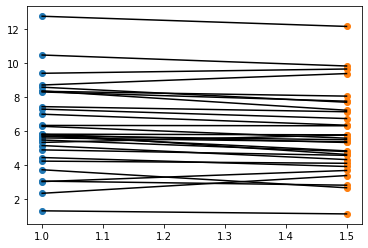

In [27]:
%matplotlib inline
x1=data_list['aware_dia']
x2=data_list['aware_sys']
y1=np.full(len(x1),1)
y2=np.full(len(x1),1.5)
plt.scatter(y1,x1)
plt.scatter(y2,x2)
for i in range (len(x1)):
    plt.plot([y1[i],y2[i]],[x1[i],x2[i]],color='k')


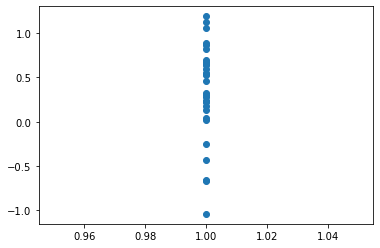

In [28]:

plt.scatter(y1,x1-x2)

In [38]:
%matplotlib qt

color_list=['tab:orange','b','tab:orange','b']
facecolor_list=['w','w','tab:orange','b']
xticklab=['Aware','Unaware']
xlab='Awareness'
cond_list=['aware_sys','aware_dia','unaware_sys','unaware_dia']
    
    
hatch_list=['///','///','','']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,color,hatch,adj,facecolor,alpha in zip(cond_list,color_list,hatch_list,adj_list,facecolor_list,alpha_list):
    
    
    ax.bar(x=x+adj,height=[dict_awa_list[cond]['mean']],facecolor=facecolor,yerr=[dict_awa_list[cond]['sem']],
            edgecolor=color,hatch=hatch,linewidth=2.5,capsize=(2),ecolor='0.3',
            width=0.5,label=cond.split('_')[0]+' '+cond.split('_')[1],alpha=alpha)
    
    x+=1
    


plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
plt.ylabel('current density (A.U.)',size='x-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')



In [ ]:
os.chdir('Z:/BBC/WP1/data/EEG/tsk')
png=f'P1_int_inverse_space_cardXawa.svg'
fig_path=f'ana/results_report/images/barplots/{png}'

fig.savefig(fig_path,dpi=1500,bbox_inches='tight',format='svg')

In [30]:
import scipy.stats as stats

In [35]:
t,p=stats.ttest_rel(data_list['aware_dia'],data_list['aware_sys'])

In [37]:
#eff size
import math
d=t/math.sqrt(30)
d

0.6296706412732299

In [32]:
stats.ttest_rel(data_list['aware_sys'],data_list['unaware_sys'])

Ttest_relResult(statistic=0.05812148762371486, pvalue=0.9540505067011734)

In [33]:
stats.ttest_rel(data_list['aware_dia'],data_list['unaware_dia'])

Ttest_relResult(statistic=0.8227129249223837, pvalue=0.4173851701617264)

In [34]:
stats.ttest_rel(data_list['aware_sys'],data_list['unaware_sys'])

Ttest_relResult(statistic=0.05812148762371486, pvalue=0.9540505067011734)

In [ ]:
stats.ttest_rel(data_list['unaware_dia'],data_list['unaware_sys'])

In [ ]:
import pingouin as pg
pg.ttest(data_list['aware_dia'],data_list['aware_sys'],paired=True)

In [ ]:
pg.ttest(data_list['unaware_dia'],data_list['unaware_sys'],paired=True)

In [39]:
data_list

,aware_sys,unaware_sys,aware_dia,unaware_dia
0,4.635817,4.183252,5.827235,4.774392
1,6.743578,4.936758,7.296629,4.670620
2,12.153115,9.533453,12.750934,8.331629
3,5.773338,4.068379,5.341804,3.797880
4,7.231886,7.771094,8.363235,8.911355
5,4.846071,4.603290,5.715247,5.147561
6,4.116667,3.706580,4.243914,4.787787
7,5.591930,6.180640,6.286517,6.056340
8,6.352995,7.361961,6.999497,7.043335
9,9.829655,7.547172,10.474514,8.255515


In [43]:
data_list['id']=data_list.index
anova_df=pd.wide_to_long(data_list,stubnames=['aware','unaware'],i='id',j='cardiac_phase',sep='_',suffix='\D+')
anova_df.rename(columns=dict(aware='AmplitudeAware',unaware='AmplitudeUnaware'),inplace=True)
anova_df.reset_index(inplace=True)
anova_df=pd.wide_to_long(anova_df,stubnames=['Amplitude'],i=['cardiac_phase','id'],j='awareness',sep="",suffix='\D+')
anova_df.reset_index(inplace=True)

In [44]:
anova_df

,cardiac_phase,id,awareness,Amplitude
0,sys,0,Aware,4.635817
1,sys,0,Unaware,4.183252
2,sys,1,Aware,6.743578
3,sys,1,Unaware,4.936758
4,sys,2,Aware,12.153115
...,...,...,...,...
115,dia,27,Unaware,6.668054
116,dia,28,Aware,8.714131
117,dia,28,Unaware,9.540872
118,dia,29,Aware,7.444704


In [46]:
import pingouin as pg
pg.rm_anova(data=anova_df,within=['awareness','cardiac_phase'], subject='id',dv='Amplitude')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,awareness,0.449102,1,29,0.449102,0.219958,0.642579,0.642579,0.000643,1.0
1,cardiac_phase,1.629963,1,29,1.629963,9.650587,0.004208,0.004208,0.002330,1.0
2,awareness * cardiac_phase,0.344405,1,29,0.344405,2.261929,0.143403,0.143403,0.000493,1.0


In [49]:
pg.pairwise_tests(data=anova_df,within=['awareness','cardiac_phase'], subject='id',dv='Amplitude',padjust='fdr_bh')

,Contrast,awareness,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,awareness,-,Aware,Unaware,True,True,0.468997,29.0,two-sided,0.642579,NaN,NaN,0.215,0.049570
1,cardiac_phase,-,dia,sys,True,True,3.106539,29.0,two-sided,0.004208,NaN,NaN,9.441,0.098396
2,awareness * cardiac_phase,Aware,dia,sys,True,True,3.448848,29.0,two-sided,0.001743,0.003487,fdr_bh,20.321,0.138059
3,awareness * cardiac_phase,Unaware,dia,sys,True,True,1.165462,29.0,two-sided,0.253329,0.253329,fdr_bh,0.36,0.050273


## Significant label analysis


In [ ]:
target_lab_sig= [hp.get_sig_label_points(stc,lab,fwd['src'],smooth=False) for lab in target_label]
target_lab_sig

In [ ]:
target_lab_sig[0].name

In [ ]:
hp.visualize_label(target_lab_sig[0],stc)

In [ ]:
stc.plot('fsaverage',hemi='both')

## Cluster label analysis 

In [ ]:
stc_list_card

In [ ]:
%matplotlib qt

effect_labels=['card','aware','cardXawa']
clu, data_list=hp.Anovas_clus_label_time_course(stc_list_card,search_lab_card,lab_sig_clu,crop_value=[-0.15,0.6],effects_labels=effect_labels,FDR=False,p_val=0.05,effects='A:B',n_perm=10000,thresh=None)





In [ ]:
F_obs, clusters, clust_p, H0=clu

In [ ]:
clust_p

In [ ]:
plt.plot(F_obs)

In [ ]:
data_N=np.swapaxes(data_list,1,0)
# da 100 a 104 dovrebbe corrispondere a tempo di interess
data_N.shape

In [ ]:
data_list_VAN=np.mean(data_N[:,:,100:108],2)
np.shape(data_list_VAN)

In [ ]:
df=pd.DataFrame(data_list_VAN,columns=['awa_sys','unawa_sys','awa_dia','unawa_dia'])
df

In [ ]:
df['sys_diff']=df['awa_sys']-df['unawa_sys']
df['dia_diff']=df['awa_dia']-df['unawa_dia']

In [ ]:
import seaborn as sns
ax=sns.distplot(df['dia_diff'])

ax=sns.distplot(df['sys_diff'],color='r')

In [ ]:
df['awa_diff']=df['awa_sys']-df['awa_dia']
df['unawa_diff']=df['unawa_sys']-df['unawa_dia']

In [ ]:
import seaborn as sns
ax=sns.distplot(df['awa_diff'])

ax=sns.distplot(df['unawa_diff'],color='r')

In [ ]:
#df.reset_index(inplace=True)
df_wide=pd.wide_to_long(df,['awa','unawa'],sep='_',i='index',j='card',suffix=r'\w+')
df_wide.drop('level_0',axis=1,inplace=True)
df_wide=df_wide.stack()
df_wide=df_wide.reset_index()
df_wide

In [ ]:
df_wide.columns

In [ ]:
sns.boxenplot(data=df_wide,y=0,x='card',hue='level_2')

In [ ]:
import pingouin as pg
pg.rm_anova(data=df_wide,dv=0,within=['card','level_2'],subject='index')

In [ ]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['card','level_2'],subject='index')

In [ ]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['level_2','card'],subject='index')

In [ ]:
data_list_VAN=np.mean(data_N[:,:,40:45],2)
np.shape(data_list_VAN)

In [ ]:
df=pd.DataFrame(data_list_VAN,columns=['awa_sys','unawa_sys','awa_dia','unawa_dia'])
df

In [ ]:
df['sys_diff']=df['awa_sys']-df['unawa_sys']
df['dia_diff']=df['awa_dia']-df['unawa_dia']

In [ ]:
import seaborn as sns
ax=sns.distplot(df['dia_diff'])

ax=sns.distplot(df['sys_diff'],color='r')

In [ ]:
df['awa_diff']=df['awa_sys']-df['awa_dia']
df['unawa_diff']=df['unawa_sys']-df['unawa_dia']

In [ ]:
import seaborn as sns
ax=sns.distplot(df['awa_diff'])

ax=sns.distplot(df['unawa_diff'],color='r')

In [ ]:
df.reset_index(inplace=True)
df_wide=pd.wide_to_long(df,['awa','unawa'],sep='_',i='index',j='card',suffix=r'\w+')
df_wide.drop('level_0',axis=1,inplace=True)
df_wide=df_wide.stack()
df_wide=df_wide.reset_index()
df_wide

In [ ]:
df_wide.columns

In [ ]:
sns.boxenplot(data=df_wide,y=0,x='card',hue='level_2')

In [ ]:
sns.boxenplot(data=df_wide,y=0,hue='card',x='level_2')

In [ ]:
import pingouin as pg
pg.rm_anova(data=df_wide,dv=0,within=['level_2','card'],subject='index')

In [ ]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['card','level_2'],subject='index')

In [ ]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['level_2','card'],subject='index')

In [ ]:
clust_p

In [ ]:
H0

In [ ]:
point=target_label[0].get_vertices_used(np.arange(5124))

In [ ]:
point

In [ ]:
plt.plot(point)

## Rsp labels

### notes RSP X awa
- Strong main effect of rsp in visual areas (always more activity in inhlation)
    - plus sensorimotor areas: postcentral_13, precentral_15
- interaction effect --> 
    - insula activity around 270 ms after so
    - strong activation in precentral_4 and precentral_6

In [88]:
search_lab_rsp=['maskON_correct_cfa_vep_norm_aware_inh','maskON_correct_cfa_vep_norm_unaware_inh','maskON_correct_cfa_vep_norm_aware_exh','maskON_correct_cfa_vep_norm_unaware_exh']
stc_list_rsp = [hp.get_list_cond(stc_files, lab) for lab in search_lab_rsp]

this is nasal
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM

In [ ]:
%matplotlib qt

effect_labels=['rsp','aware','rspXawa']
hp.Anovas_label_time_course(stc_list_rsp,search_lab_rsp,target_label,crop_value=[-0.15,0.6],effects_labels=effect_labels,FDR=False,p_val=0.01)




In [ ]:
stc_lab_lh,stc_lab_rh=hp.plot_label_effect(stc,target_label)

In [ ]:
stc.data[stc.data!=0.]

In [ ]:
np.where(stc.data!=0.)

In [ ]:
stc_lab_rh.vertices

In [ ]:
target_label[0]

In [ ]:
target_label[0].get_vertices_used(np.arange(2562))

In [ ]:
stc_lab=stc.in_label(target_label[1])
stc_lab

In [ ]:
lab=mne.stc_to_label(stc_lab,src=fwd['src'])
lab

In [ ]:
2562*2

In [ ]:
vx=target_lab_sig[1].get_vertices_used(np.arange(5124))
vx

In [ ]:
vx_test=target_lab_sig[1].get_vertices_used(np.arange(2562))
vx_test=vx_test+2562
vx_test

In [ ]:
stc_vx=np.zeros(5124)

In [ ]:
stc_vx[vx]=1


In [ ]:
stc_vx_test=np.zeros(5124)
stc_vx_test[vx_test]=1

In [ ]:
stc_vx_plot = mne.SourceEstimate(
        stc_vx, stc.vertices, tmin=0.9, tstep=stc.tstep)

In [ ]:
stc_vx_plot.plot('fsaverage')

In [ ]:
stc_vx_test_plot=mne.SourceEstimate(
        stc_vx_test, stc.vertices, tmin=0.9, tstep=stc.tstep)

In [ ]:
stc_vx_test_plot.plot('fsaverage',hemi='both')

In [ ]:
np.mean(stc_lab.data[stc_lab.data!=0])

In [ ]:
target_label

# T-test label code if needed

In [ ]:
%matplotlib qt

lab_t=['maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
stc_list =[hp.get_list_cond(stc_files,lab) for lab in lab_t]



In [ ]:
target_label

In [ ]:
hp.t_test_label_time_course(stc_list,lab_t,target_label[1],crop_value=[-0.15,0.6],p_val=0.05,FDR=False)

In [ ]:
a=np.random.randint(0,15,8)
b=np.random.randint(0,15,8)

In [ ]:
diff=a-b
mean_diff=np.mean(diff)
mean_diff

In [ ]:
diff

In [ ]:
mean_a=np.mean(a)
mean_b=np.mean(b)
diff_mean=mean_a-mean_b
diff_mean

## Cluster anova analyses 
### read stc

In [ ]:
# reading labels


In [8]:
# read effects
g_num=None
eeg_format='.stc'
eeg_exp='tsk'
clus_effect='ana/MNE/cluster_stats/'


In [9]:
files = GetFiles(clus_effect,g_num=g_num,eeg_format=eeg_format)
clus_files=files.fflist
clus_files

['ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_-90_to_120ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_240_to_340ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_270_to_310ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_310_to_350ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms-lh.stc',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms-rh.stc',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms_clus_9.npy',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_90_to_110ms\\aware_dia_vs_aware_sys_90_to_110ms-

In [10]:
name='aware_dia_vs_aware_sys'
effects_clus=[x for x in clus_files if name in x ]
effects_clus

['ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_-90_to_120ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_240_to_340ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_270_to_310ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_310_to_350ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms-lh.stc',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms-rh.stc',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms\\aware_dia_vs_aware_sys_400_to_500ms_clus_9.npy',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_400_to_500ms.txt',
 'ana/MNE/cluster_stats/ttests\\nasal\\aware_dia_vs_aware_sys_90_to_110ms\\aware_dia_vs_aware_sys_90_to_110ms-

In [14]:
time1=90
time2=120

rsp_cond='nasal'

left_cond='aware_dia'
right_cond='aware_sys'

file_name=f'ana/MNE/cluster_stats/ttests/{rsp_cond}/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [15]:

file_name=f'ana/MNE/cluster_stats/ttests/{rsp_cond}/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [16]:
with open(file_name,'r') as file:
    text=file.read()
    print(text)

Analyses info:
cluster pvalue: 0.05
Time smooth is False
Time range is 90 to 120 ms,
Number of permutations: 5000
T statistics threshold for clustering is: 2.0452296421327034
index of good clusters [4] and values: [0.0244]



In [17]:
stc=mne.read_source_estimate(file_name[:-4])

In [20]:
stc.plot('fsaverage',hemi='rh')

Using control points [0.015625   0.0234375  0.03515625]


### get significant cluster

In [76]:
label_sig_cluster=mne.stc_to_label(stc,fwd['src'],smooth=False,connected=False)

-- number of adjacent vertices : 5124


In [77]:
label_sig_cluster[0].name='lh'

In [78]:
search_lab_card=['maskON_correct_cfa_vep_norm_aware_sys','maskON_correct_cfa_vep_norm_unaware_sys','maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
stc_list_card = [hp.get_list_cond(stc_files, lab) for lab in search_lab_card]

this is nasal
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/s

In [80]:
%matplotlib qt

effect_labels=['card','aware','cardXawa']
data_list=hp.Anovas_label_time_course(stc_list_card,search_lab_card,label_sig_cluster[0],crop_value=(-0.1,0.5),effects_labels=effect_labels,FDR=True,p_val=0.05,plot_bar=False)




(30, 5124, 155)
(30, 5124, 155)
(30, 5124, 155)
(30, 5124, 155)
(4, 30, 5124, 155)
5124
155
the rh is False
(4, 30, 155)
(30, 4, 155)
155
155
155


C:\Users\Vivi\switchdrive\BBC\WP1\data\Code\python\BBC\stats\inverse_stats_helper.py:472: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


In [32]:
fwd['src']

<SourceSpaces: [<surface (lh), n_vertices=163842, n_used=2562>, <surface (rh), n_vertices=163842, n_used=2562>] head coords, subject 'fsaverage', ~30.8 MB>

In [61]:
time1=270
time2=310

rsp_cond='oral'

left_cond='aware_dia'
right_cond='unaware_dia'

file_name=f'ana/MNE/cluster_stats/ttests/{rsp_cond}/tsk_o_{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [62]:

file_name=f'ana/MNE/cluster_stats/ttests/{rsp_cond}/tsk_o_{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms/tsk_o_{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [63]:
with open(file_name,'r') as file:
    text=file.read()
    print(text)

Analyses info:
cluster pvalue: 0.01
Time smooth is False
Time range is 270 to 310 ms,
Number of permutations: 5000
T statistics threshold for clustering is: 2.7563859036703353
index of good clusters [0 1] and values: [0.0562 0.002 ]



In [64]:
stc=mne.read_source_estimate(file_name[:-4])

In [65]:
stc.plot('fsaverage',hemi='both')

Using control points [0.0234375  0.03125    0.04296875]


st

In [ ]:
max_cord=np.argmax(stc.data[:,0])

In [ ]:
stc.data[:,0][max_cord]

In [ ]:
fwd['src']

In [ ]:
np.shape(fwd['src'][0]['rr'])

In [ ]:
stc.get_peak(hemi='lh')

In [ ]:
stc.lh_vertno[133]

In [ ]:
brain=mne.viz.plot_source_estimates(subject='fsaverage',hemi='split',stc=stc,src=fwd['src'])


In [ ]:
brain.add_foci(coord,hemi='lh',color='red')

In [ ]:
coord

In [ ]:
brain.get_picked_points()

In [ ]:

lab=['maskON_correct_cfa_vep_norm_aware_sys','maskON_correct_cfa_vep_norm_unaware_sys','maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
effect_labels=['card','aware','cardXawa']
stc_all_cluster,clu,stc_time_course=hp.Anovas_cluster(stc_files, lab,fwd['src'],crop_value=[0.27,0.31],effects='B',n_perm=50)






In [ ]:
lab=['maskON_correct_cfa_vep_norm_aware_inh','maskON_correct_cfa_vep_norm_unaware_inh','maskON_correct_cfa_vep_norm_aware_exh','maskON_correct_cfa_vep_norm_unaware_exh']
effect_labels=['rsp','aware','rspXawa']
stc_list=[hp.get_list_cond(stc_files,label) for label in lab ]

In [ ]:
effect_labels=['cardiac','aware','cardXawa_p1']

In [ ]:
stc_list

In [ ]:
n_perm=5000
effect_list=['A','B','A:B']
p1_crop=[0.08,0.095]
SO_crop=[0.01,0.03]
VAN_crop=[0.45,0.5]
for label,effect in zip(effect_labels,effect_list):
    if effect == 'A:B':
        label_anova=f'cardXawa_{label}'
        F_obs, clusters, clust_p, H0=hp.Anovas_cluster(stc_list,fwd['src'],crop_value=VAN_crop,effects=effect,n_perm=n_perm,label=label_anova,time_smooth=True,pval=0.05)







In [ ]:
clust_p

In [ ]:
clusters

In [ ]:
clusters[2][0]-2562

In [ ]:
lab_sig_clu=mne.Label(vertices=clusters[1][0]-2562,hemi='rh',name='test_clu_P1_int-rh')

In [ ]:
lab_sig_clu.vertices

In [ ]:
stc

In [ ]:
hp.visualize_label(lab_sig_clu,stc)

In [ ]:
np.where(clust_p<.5)


In [ ]:
len(clusters[3][0])

In [ ]:
np.shape(H0)

In [ ]:
%matplotlib inline
import seaborn as sns
sns.distplot(H0)


In [ ]:
clu_chosen=clusters[9]
clu_chosen

In [ ]:
F_val=np.sum(F_obs[clu_chosen])
F_val

In [ ]:
np.quantile(H0,0.95)

## clu contrasts

In [ ]:
lab_left=['aware','aware_sys','aware_dia','aware_exh','aware_inh','sys']
lab_right=['unaware','unaware_sys','unaware_dia','unaware_exh','unaware_inh','dia']
#lab_left=['aware_inh']
#lab_right=['unaware_inh']
#times=[[0.075,0.095],[0.095,0.12],[0.27,0.31],[0.31,0.35],[0.4,0.5]]
times=[[0.26,0.340],[0.27,0.340],[0.26,0.350],[0.27,0.350]]

In [ ]:
np.quantile(H0,0.95)

## clu contrasts

In [11]:
lab_left=['aware','aware_sys','aware_dia','aware_exh','aware_inh','sys','inh']
lab_right=['unaware','unaware_sys','unaware_dia','unaware_exh','unaware_inh','dia','exh']
cond='o'
#lab_left=['aware_inh']
#lab_right=['unaware_inh']
times=[[0.095,0.12],[0.13,0.15],[0.24,0.34],[0.27,0.31],[0.31,0.35],[0.33,0.37],[0.4,0.5]]
#times=[[0.26,0.340],[0.27,0.340],[0.26,0.350],[0.27,0.350]]

In [12]:

for time_cr in times:
    crop_value=time_cr
    for lab_l,lab_r in zip(lab_left,lab_right):
        lab=[f'tsk_{cond}_maskON_correct_cfa_vep_norm_{lab_l}',f'tsk_{cond}_maskON_correct_cfa_vep_norm_{lab_r}']
        stc_list=[hp.get_list_cond(stc_files,label) for label in lab ]
        X1=hp.get_DF_clus(stc_list[0],crop_value=crop_value)
        X2=hp.get_DF_clus(stc_list[1],crop_value=crop_value)
        X=X1-X2
        n_perm=5000
        lab_title=f'tsk_{cond}_{lab_l}_vs_{lab_r}_{int(time_cr[0]*1000)}_to_{int(time_cr[1]*1000)}ms'


        stc_all_cluster,clu=hp.get_tTest_cluster(X, stc_list[0], src=fwd['src'], label=lab_title, FDR=False, p_val=.05
                                         , report=None, crop_value=crop_value, n_perm=n_perm, thresh=None,time_smooth=False,t_pow=1)



['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\c

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_tsk_o_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using pyvistaqt 3d backend.

Using control points [0.015625   0.01953125 0.0234375 ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\awa

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.08984375 0.09375    0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0703125  0.07421875 0.09765625]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.07421875 0.0859375  0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.078125   0.0859375  0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.08203125 0.08984375 0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.05859375 0.078125  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.04296875 0.04296875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0390625  0.04296875 0.04296875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.04296875 0.04296875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0390625  0.04296875 0.04296875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.04296875 0.04296875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.015625   0.02734375 0.04296875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.046875   0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.046875 0.046875 0.046875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_correct_c

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.02734375 0.03515625 0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.046875   0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.046875   0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.046875 0.046875 0.046875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.046875   0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0390625  0.04296875 0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0234375 0.03125   0.046875 ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_tsk_o_maskON_correc

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0390625  0.04296875 0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.03515625 0.0390625  0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.03515625 0.03515625 0.046875  ]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.10546875 0.10546875 0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0859375  0.09375    0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.08984375 0.09765625 0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.08984375 0.09765625 0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_tsk_o_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.078125   0.0859375  0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_sys-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.02734375 0.05859375 0.10546875]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g01_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g03_tsk_o_maskON_correct_cfa_vep_norm_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\inh\\g08_tsk_o_maskON_correct_cfa_vep_norm_inh-lh.stc', 'ana/MNE/source/5124_source/

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.04296875 0.05859375 0.09717383]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]


In [11]:
import base.base_constants as bs


In [12]:
p1_crop=[0.09,0.12]
SO_crop=[-0.01,0.02]
VAN_crop=[0.24,0.34]

crop_value=p1_crop
crop_value
lab=['maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_aware_sys']
effect_labels=['cardiac','aware','cardXawa']
stc_list=[hp.get_list_cond(stc_files,cond=label,g_list=bs.G_N) for label in lab ]
X1=hp.get_DF_clus(stc_list[0],crop_value=crop_value)
X2=hp.get_DF_clus(stc_list[1],crop_value=crop_value)
X=X1-X2

this is nasal
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM

In [27]:
stc_files

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskOFF_

In [9]:
os.getcwd()

'Z:\\BBC\\WP1\\data\\EEG\\tsk'

## 

In [13]:
n_perm=5000


stc_all_cluster,clu=hp.get_tTest_cluster(X, stc_list[0], src=fwd['src'], label='Test_n_', FDR=False, p_val=.05
                                         , report=None, crop_value=crop_value, n_perm=n_perm, thresh=None,time_smooth=False,t_pow=1)


-- number of adjacent vertices : 5124
Test_n_
30
clus threshold for display is 0.1
(30, 9, 5124)
stat_fun(H1): min=-3.592049 max=4.853276
Running initial clustering
Found 32 clusters
Permuting 4999 times...


  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using pyvistaqt 3d backend.

Using control points [0.015625   0.0234375  0.03515625]


2023-07-05 16:07:40.243 python[19032:3281171] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (1.08 secs).
2023-07-05 16:07:40.244 python[19032:3281171] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (1.08 secs).


Writing STC to disk...
[done]


### stc_all_cluster.plot()

In [14]:
T_obs, clusters, cluster_p_values, H0=clu

In [15]:
cluster_p_values

array([0.762 , 0.9998, 0.999 , 0.9974, 0.0284, 0.995 , 1.    , 1.    ,
       0.9984, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       0.9688, 0.2788, 0.995 , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ])

In [17]:
clusters

[(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 4, 4, 4, 4, 4

In [18]:
vtx=np.unique(clusters[4][1])

In [19]:
lab_sig_clu_0=mne.Label(vertices=vtx-2562,hemi='rh',name='clu_P1_dia_card-rh')

In [ ]:
clusters[2]

In [ ]:
np.array(clusters).flatten()

In [ ]:
np.shape(np.where(cluster_p_values<0.05))

In [ ]:
np.shape(clusters)

In [ ]:
el=abs(H0.copy())
el.sort()
el

In [ ]:
import seaborn as sns
sns.boxenplot(H0)

In [ ]:
np.percentile(H0,97.5)

In [ ]:
cluster_p_values

In [ ]:
clusters[0]

In [ ]:
p1_crop=[0.09,0.12]
lab=['maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_aware_sys']
effect_labels=['cardiac','aware','cardXawa']
stc_list=[hp.get_list_cond(stc_files,label) for label in lab ]
X1=hp.get_DF_clus(stc_list[0],crop_value=p1_crop)
X2=hp.get_DF_clus(stc_list[1],crop_value=p1_crop)
X=X1-X2

In [ ]:
n_perm=5000


SO_crop=[-0.01,0.02]
stc_all_cluster,clu=hp.get_tTest_cluster(X, stc_list[0], src=fwd['src'], label=None, FDR=False, p_val=.05, report=None, crop_value=p1_crop, n_perm=n_perm, thresh=None,time_smooth=False)


In [ ]:
T_obs, clusters, cluster_p_values, H0=clu
cluster_p_values

In [ ]:
clusters[1]

# T-tests template

In [8]:
list_o=[x for x in stc_files if '_o_' in x]
list_o

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\norm\\aware\\dia\\exh\\g01_o_tsk_maskOFF_correct_cfa_vep_norm_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\norm\\aware\\dia\\exh\\g01_o_tsk_maskOFF_correct_cfa_vep_norm_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\norm\\aware\\dia\\inh\\g01_o_tsk_maskOFF_correct_cfa_vep_norm_aware_dia_inh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\exh\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\exh\\g03_tsk_o_maskON_correc

In [12]:
mne.viz.set_3d_backend('notebook')

ImportError: DLL load failed while importing vtkIONetCDF: The specified procedure could not be found.

In [18]:
p1_crop=[-0.1,0.5]
lab=['tsk_o_maskON_correct_cfa_vep_norm_aware_sys','tsk_o_maskON_correct_cfa_vep_norm_unaware_sys']
hp.tTest_ana(stc_files,lab,crop_value=p1_crop,FDR=False,p_val=0.05,time_smooth=False)


this is oral
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_tsk_o_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/so

<SourceEstimate | 5124 vertices, tmin : -100.0 (ms), tmax : 501.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 155), ~6.1 MB>

In [ ]:

hp.tTest_ana(stc_files,lab,crop_value=(-0.1,0.6),FDR=False,p_val=0.01)

In [9]:
p1_crop=[-0.1,0.5]
lab=['tsk_o_maskON_correct_cfa_vep_norm_aware_dia','tsk_o_maskON_correct_cfa_vep_norm_unaware_dia']

hp.get_list_cond(stc_files,lab)

[]


IndexError: list index out of range

In [10]:
stc_files


['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskOFF_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskOFF\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskOFF_